<a href="https://colab.research.google.com/github/athospugliesedev/python_codes/blob/main/Atividade_Regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <h align=centre><font size = 8, style="color:rgb(200,0,0)">Atividade: Regressão Linear</font></h>

**Importanto a biblioteca a ser utilizada**

In [2]:
import pandas as pd
import numpy as np

# QUESTÃO 01

Na	 engenharia de	 recursos	 hídricos	 a	 estimativa dos	 tamanhos	 dos reservatórios	 depende	 de	estimativas	acuradas	 do	escoamento	 da	água	 do	 rio	 que	está sendo	confinado.	Em	alguns	rios,	registros	históricos	de	longa	duração	de	 tais	dados	de	escoamento	 são	 difíceis	 de	 obter.	 Já	 os	 dados	 meteorológicos	 sobre precipitação	 estão	disponíveis	 para	 muitos	 anos	 do	 passado.	 Portanto,	 é	 útil	 determinar	 a	 relação	 entre	escoamento	e	precipitação.	<br>
Essa	 relação	 pode	 ser	 usada	 para	 fazer	 uma	 estimativa	 do	 escoamento	 nos	anos	nos	quais	apenas	medidas	de	precipitação	foram	feitos.	Os	seguintes	dados	estão	disponíveis	para	um	rio	que	deve	ser	estancado:

Precipitação [cm/ano] e Escoamento [m3/s]


a) Calcula através do método de regressão linear a função que melhor ajusta aos dados <br>
b) Determine o coeficiente de correlação dos dados. <br>
c) Utilize a função da reta para prever o escoamento se a precipitação for de (cm)
- 55.5
- 66.4
- 22.1
- 1
<br>
d) Faça	uma	estimativa	de	escoamento	para	140 cm/ano

## Base de Dados

In [3]:
v1 = [88.9, 108.5, 104.1, 139.7, 127]
v2 = [14.6, 16.7, 15.3, 23.2, 19.5]
dados = {'Precipitação': v1, 'Escoamento': v2}
df = pd.DataFrame(dados)
df

,Precipitação,Escoamento
0,88.9,14.6
1,108.5,16.7
2,104.1,15.3
3,139.7,23.2
4,127.0,19.5


## Pré-Analise dos dados

In [4]:
v1 = [88.9, 108.5, 104.1, 139.7, 127]
v2 = [14.6, 16.7, 15.3, 23.2, 19.5]

dados = {'Precipitação': v1, 'Escoamento': v2}
df = pd.DataFrame(dados)

descricao = df.describe()
print(descricao)


       Precipitação  Escoamento
count      5.000000    5.000000
mean     113.640000   17.860000
std       19.919287    3.526046
min       88.900000   14.600000
25%      104.100000   15.300000
50%      108.500000   16.700000
75%      127.000000   19.500000
max      139.700000   23.200000


## Seleção das variveis

In [5]:
precipitacao = df['Precipitação']
print("Variável Precipitação:")
print(precipitacao)

escoamento = df['Escoamento']
print("\nVariável Escoamento:")
print(escoamento)


Variável Precipitação:
0     88.9
1    108.5
2    104.1
3    139.7
4    127.0
Name: Precipitação, dtype: float64

Variável Escoamento:
0    14.6
1    16.7
2    15.3
3    23.2
4    19.5
Name: Escoamento, dtype: float64


## Divisão - Treino e Teste

In [6]:
from sklearn.model_selection import train_test_split

X = df[['Precipitação']]
y = df['Escoamento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape do conjunto de treinamento de entrada (X_train):", X_train.shape)
print("Shape do conjunto de teste de entrada (X_test):", X_test.shape)
print("Shape do conjunto de treinamento do alvo (y_train):", y_train.shape)
print("Shape do conjunto de teste do alvo (y_test):", y_test.shape)


Shape do conjunto de treinamento de entrada (X_train): (4, 1)
Shape do conjunto de teste de entrada (X_test): (1, 1)
Shape do conjunto de treinamento do alvo (y_train): (4,)
Shape do conjunto de teste do alvo (y_test): (1,)


## Seleção do modelo --> Regressão Linear

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

modelo_regressao = LinearRegression()

modelo_regressao.fit(X_train, y_train)

y_pred = modelo_regressao.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro Quadrático Médio (MSE):", mse)
print("Coeficiente de Determinação (R²):", r2)


Erro Quadrático Médio (MSE): 0.12662760278046092
Coeficiente de Determinação (R²): nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


## Treinamento do modelo

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

modelo_regressao = LinearRegression()

modelo_regressao.fit(X, y)

y_pred = modelo_regressao.predict(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Erro Quadrático Médio (MSE):", mse)
print("Coeficiente de Determinação (R²):", r2)


Erro Quadrático Médio (MSE): 0.6158973430986581
Coeficiente de Determinação (R²): 0.9380783657304493


## Metricas do modelo

In [9]:
from math import sqrt

mse = mean_squared_error(y, y_pred)

rmse = sqrt(mse)

r2 = r2_score(y, y_pred)

print("Erro Quadrático Médio (MSE):", mse)
print("Raiz do Erro Quadrático Médio (RMSE):", rmse)
print("Coeficiente de Determinação (R²):", r2)


Erro Quadrático Médio (MSE): 0.6158973430986581
Raiz do Erro Quadrático Médio (RMSE): 0.7847912735872247
Coeficiente de Determinação (R²): 0.9380783657304493


## Previsão dos novos dados

In [10]:
novos_dados_precipitacao = [[110.0], [120.0], [130.0]]

previsoes_escoamento = modelo_regressao.predict(novos_dados_precipitacao)

print("Previsões de Escoamento:")
for i, previsao in enumerate(previsoes_escoamento):
    print(f"Para a precipitação {novos_dados_precipitacao[i][0]}, a previsão de escoamento é {previsao}")


Previsões de Escoamento:
Para a precipitação 110.0, a previsão de escoamento é 17.235927395168076
Para a precipitação 120.0, a previsão de escoamento é 18.950412573277752
Para a precipitação 130.0, a previsão de escoamento é 20.664897751387425


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### A) Calcula através do método de regressão linear a função que melhor ajusta aos dados

In [11]:
import numpy as np
from sklearn.linear_model import LinearRegression

precipitacao = np.array([55.5, 66.4, 22.1, 1]).reshape(-1, 1)  # Convertendo para matriz coluna
escoamento = np.array([110.0, 120.0, 130.0, 140.0])

modelo_regressao = LinearRegression()
modelo_regressao.fit(precipitacao, escoamento)

coeficiente_angular = modelo_regressao.coef_[0]
intercepto = modelo_regressao.intercept_

print("Coeficiente Angular:", coeficiente_angular)
print("Intercepto:", intercepto)


Coeficiente Angular: -0.3816527510955527
Intercepto: 138.83491222721378


## b) Determinando o coeficiente de correlação dos dados:


In [12]:
coeficiente_correlacao = np.corrcoef(precipitacao.flatten(), escoamento)[0, 1]
print("Coeficiente de Correlação:", coeficiente_correlacao)


Coeficiente de Correlação: -0.8905472569024953


## c) Utilize a função da reta para prever o escoamento se a precipitação for de (cm)

In [13]:
precipitacao_previsao = np.array([[55.5], [66.4], [22.1], [1]])

previsao_escoamento = modelo_regressao.predict(precipitacao_previsao)

for i, prec in enumerate(precipitacao_previsao):
    print(f"Para uma precipitação de {prec[0]} cm/ano, a previsão de escoamento é {previsao_escoamento[i]} m3/s")


Para uma precipitação de 55.5 cm/ano, a previsão de escoamento é 117.65318454141061 m3/s
Para uma precipitação de 66.4 cm/ano, a previsão de escoamento é 113.49316955446908 m3/s
Para uma precipitação de 22.1 cm/ano, a previsão de escoamento é 130.40038642800207 m3/s
Para uma precipitação de 1.0 cm/ano, a previsão de escoamento é 138.45325947611823 m3/s


## d) Fazendo uma estimativa de escoamento para 140 cm/ano:


In [14]:
estimativa_escoamento = modelo_regressao.predict([[140]])
print("Estimativa de Escoamento para 140 cm/ano de Precipitação:", estimativa_escoamento[0])


Estimativa de Escoamento para 140 cm/ano de Precipitação: 85.4035270738364


# QUESTÃO 02

 É esperado que a massa muscular de uma pessoa diminua com a idade. Para estudar essa relação, uma nutricionista selecionou 18 mulheres, com idade entre 40 e 79 anos, e observou em cada uma delas a idade (X) e a massa muscular (Y).

- a. Construa o diagrama de dispersão e interprete-o.

- b. Calcule o coeficiente de correlação linear entre X e Y.

- c. Ajuste uma reta de regressão para a relação entre as variáveis Y: massa muscular (dependente) e X: idade (independente).

- d. Considerando a reta estimada dada no item (c), estime a massa muscular média de mulheres com 50 anos.

In [15]:
# Dados de fornecidos e formatando para formato adequado.

X = np.array([71,64,43,67,56,73,68,56,76,65,45,58,45,53,49,78,73,68]).reshape(-1, 1)
Y = np.array([82,91,100,68,87,73,78,80,65,84,116, 76,97,100,105,77, 73,78]).reshape(-1, 1)

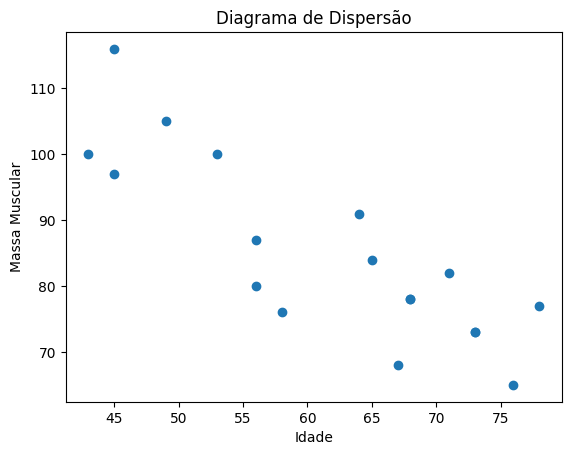

Coeficiente de Correlação Linear: -0.8366766292645965
Reta de regressão: Y = -1.0266652939359624 X + 148.1969525378359
Massa muscular média para mulheres com 50 anos: 96.86368784103777


In [16]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

plt.scatter(X, Y)
plt.title('Diagrama de Dispersão')
plt.xlabel('Idade')
plt.ylabel('Massa Muscular')
plt.show()

correlation_matrix = np.corrcoef(X.reshape(-1), Y.reshape(-1))
correlation_coef = correlation_matrix[0, 1]
print("Coeficiente de Correlação Linear:", correlation_coef)

model = LinearRegression().fit(X, Y)
slope = model.coef_[0]
intercept = model.intercept_
print("Reta de regressão: Y =", slope[0], "X +", intercept[0])

age_50 = np.array([[50]])
predicted_mass_50 = model.predict(age_50)
print("Massa muscular média para mulheres com 50 anos:", predicted_mass_50[0][0])


# QUESTÃO 03

Os dados abaixo correspondem às variáveis renda familiar e gasto com alimentação numa amostra de dez famílias, representadas em salários mínimos.

(a)
Qual a previsão do gasto com alimentação para uma família com renda de 170 reais?

(b)
Qual a previsão do gasto para famílias com excepcional renda, por exemplo 1.000 reais? Você acha esse valor razoável? Por quê?


In [17]:
# Dados de fornecidos e formatando para formato adequado.

Renda = np.array([3,5,10,20,30,50,70,100,150,200]).reshape(-1, 1)
Gasto = np.array([1.5,2.0,6.0,10.0,15.0,20.0,25.0,40.0,60.0,80.0]).reshape(-1, 1)

In [18]:
model = LinearRegression().fit(Renda, Gasto)

renda_170 = np.array([[170]])
previsao_170 = model.predict(renda_170)
print("Previsão do gasto com alimentação para uma família com renda de 170 reais:", previsao_170[0][0])

renda_1000 = np.array([[1000]])
previsao_1000 = model.predict(renda_1000)
print("Previsão do gasto para famílias com renda excepcional de 1000 reais:", previsao_1000[0][0])


Previsão do gasto com alimentação para uma família com renda de 170 reais: 67.55843522948787
Previsão do gasto para famílias com renda excepcional de 1000 reais: 392.7467708271802
